In [1]:
'''
无量纲化使不同规格的数据转换到同一规格。常见的无量纲化方法有标准化和区间缩放法。标准化的前提是特征值服从正态分布，
标准化后，其转换成标准正态分布。区间缩放法利用了边界值信息，将特征的取值区间缩放到某个特点的范围，例如[0, 1]等。

1、标准化：
数据的标准化是将数据按比例缩放，使之落入一个小的特定区间。在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权。
公式为：(X-mean)/std 计算时对每个属性/每列分别进行。
将数据按属性（按列进行）减去其均值，并除以其方差(或者标准差)。得到结果是，对于每个属性（每列）来说所有数据都聚集在0附近，方差为1。
'''
from sklearn.datasets import load_iris
import numpy as np
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
from sklearn import preprocessing
'''
假设特征值服从标准正态分布
许多学习算法中目标函数的基础都是假设所有的特征都是零均值并且具有同一阶数上的方差(比如径向基函数、支持向量机以及L1L2正则化项等)。
如果某个特征的方差比其他特征大几个数量级，那么它就会在学习算法中占据主导位置，导致学习器并不能像我们说期望的那样，从其他特征中学习。
'''
X_scaled = preprocessing.scale(X)
print(X_scaled)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))
'''
StandardScaler它使用 ``Transformer 接口在训练集上计算均值和标准差，以便于在后续的测试集上进行相同的缩放. 缩放类对象可以在新的数据上实现和训练集相同缩放操作
'''
scaler = preprocessing.StandardScaler().fit(X)
print("==============StandardScaler===============")
print(scaler)
print(scaler.mean_)                                     
print(scaler.scale_)                                     
print(scaler.transform(X))
scaler.transform([[-1.,  1., 0.]])
print("============区间缩放发===================")
'''
另外一个可选的缩放操作是将特征缩放至给定的最小、最大值范围，经常是[0,1]。 或者也可以将每个特征的最大绝对值转换至单位大小。这两类操作可以分别通过使用:class:`MinMaxScaler`或者:class:`MaxAbsScaler`实现。
如果:class:MinMaxScaler`被提供了一个精确的``feature_range=(min, max)`，完整的公式是:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std / (max - min) + min
'''
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
print(X_train_minmax)
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X)
print(X_train_maxabs)
'''
2、归一化
归一化是依照特征矩阵的行处理数据，其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准，也就是说都转化为“单位向量”
该方法主要应用于文本分类和聚类中。例如，对于两个TF-IDF向量的l2-norm进行点积，就可以得到这两个向量的余弦相似性。
'''
print("==============L2归一化 下面两种写法效果一样========================")
X_normalized_l2 = preprocessing.normalize(X, norm='l2')
print(X_normalized_l2)
normalizer = preprocessing.Normalizer().fit(X)
X_normalized = normalizer.transform(X)
print(X_normalized)
'''
3、特征二值化
对于某些定量特征，其包含的有效信息为区间划分，例如学习成绩，假若只关心“及格”或不“及格”，
那么需要将定量的考分，转换成“1”和“0”表示及格和未及格。定量特征二值化的核心在于设定一个阈值，大于阈值的赋值为1，小于等于阈值的赋值为0
'''
from sklearn.preprocessing import Binarizer
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
#默认大于0的变为1，小于等于0的变为0
binarizer = Binarizer(threshold=2).fit(X)
print(binarizer.transform(X))
'''
一个将分类特征转换成scikit-learn估计器可用特征的可选方法是使用one-of-K或者one-hot编码,
OneHotEncoder是该方法的一个实现。该方法将每个类别特征的 m 可能值转换成m个二进制特征值，当然只有一个是激活值。
'''
from sklearn.preprocessing import OneHotEncoder
print(OneHotEncoder().fit_transform([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]).toarray())
'''
缺失值处理
'''
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
a = imp.fit([[1, 2], [1, 3], [7, 6]])
print(a)
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(a.transform(X))

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
[ 0.  0.  0.]
[ 1.  1.  1.]
==============StandardScaler===============
StandardScaler(copy=True, with_mean=True, with_std=True)
[ 1.          0.          0.33333333]
[ 0.81649658  0.81649658  1.24721913]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
============区间缩放发===================
[[ 0.5         0.          1.        ]
 [ 1.          0.5         0.33333333]
 [ 0.          1.          0.        ]]
[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]
==============L2归一化 下面两种写法效果一样========================
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  0.  1

In [62]:
'''
特征提取和特征选择
通过真实数据集进行对比测试
测试数据集：iris_data
测试
'''
#导入数据集iris  
from sklearn.datasets import load_iris   
from numpy import vstack, array, nan
#载入数据集  
iris = load_iris()  
print "原始数据集中的前5个样本的特征："
print "=========================="
print(iris.data[0:5])
print "=========================="
from sklearn.feature_selection import VarianceThreshold
'''
 3.1.1 方差选择法
返回值为特征选择后的数据，参数threshold为方差的阈值。
使用方差选择法，先要计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征
'''
print "利用方差选择法过滤后的前5个样本的特征："
print "=========================="
print(VarianceThreshold(threshold=3).fit_transform(iris.data)[0:5])
print "=========================="

'''
3.1.2 相关系数法
使用相关系数法，先要计算各个特征对目标值的相关系数以及相关系数的P值。这里利用的皮尔逊相关系数
第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数
参数k为选择的特征个数
'''
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr

print "利用相关系数法过滤后的前5个样本的特征："
print "=========================="
# print (SelectKBest(lambda X, Y: array(map(lambda x:pearsonr(x, Y), X.T)).T, k=2).fit(iris.data,iris.target)[0:5])
# 定义函数
def multivariate_pearsonr(X, y):
    scores, pvalues = [], []
    for column in range(X.shape[1]):
        cur_score, cur_p = pearsonr(X[:,column], y)
        scores.append(abs(cur_score))
        pvalues.append(cur_p)
    return (np.array(scores), np.array(pvalues))

a = SelectKBest(score_func=multivariate_pearsonr, k=2)
print a.fit_transform(iris.data,iris.target)[0:5] 
print "=========================="

'''
3.1.3 卡方检验
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print "利用卡方检验过滤后的前5个样本的特征："
print "=========================="
print(SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target)[0:5])
print "=========================="


from sklearn.feature_selection import SelectKBest
from minepy import MINE
#由于MINE的设计不是函数式的，定义mic方法将其为函数式的，返回一个二元组，二元组的第2项设置成固定的P值0.5
# def mic(x, y):
#  m = MINE()
#  m.compute_score(x, y)
#  return (m.mic(), 0.5)

# #选择K个最好的特征，返回特征选择后的数据
# a = SelectKBest(lambda X, Y: array(map(lambda x:mic(x, Y), X.T)).T, k=2)
# a.fit_transform(iris.data, iris.target)

原始数据集中的前5个样本的特征：
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
利用方差选择法过滤后的前5个样本的特征：
[[ 1.4]
 [ 1.4]
 [ 1.3]
 [ 1.5]
 [ 1.4]]
利用相关系数法过滤后的前5个样本的特征：
[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]]
利用卡方检验过滤后的前5个样本的特征：
[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]]


In [6]:
from sklearn import preprocessing
from sklearn import datasets
boston = datasets.load_boston()
X, y = boston.data, boston.target
my_minmax_scaler = preprocessing.MinMaxScaler()
my_minmax_scaler.fit(X[:, :3])
my_minmax_scaler.transform(X[:, :3]).min(axis=0)

array([ 0.,  0.,  0.])

In [8]:
normalized_X = preprocessing.normalize(X[:, :3])
normalized_X

array([[  3.48255018e-04,   9.91865557e-01,   1.27289413e-01],
       [  3.86277175e-03,   0.00000000e+00,   9.99992539e-01],
       [  3.85994296e-03,   0.00000000e+00,   9.99992550e-01],
       ..., 
       [  5.09297670e-03,   0.00000000e+00,   9.99987031e-01],
       [  9.18569794e-03,   0.00000000e+00,   9.99957811e-01],
       [  3.97398371e-03,   0.00000000e+00,   9.99992104e-01]])

In [158]:
import numpy as np
from numpy import *
x=array([[1.0,1.0,0],[3.0,3.0,0],[1.0,-1.0,0]])
print x
#a = preprocessing.normalize(x[:, :3])
#a
my_scaler = preprocessing.StandardScaler()
my_scaler.fit(x[:, :3])
b = my_scaler.transform(x[:, :3])
impute = preprocessing.Imputer(strategy='most_frequent')
iris_X_prime = impute.fit_transform(x)
masking_array = x.astype(bool)
print masking_array == False
x[masking_array == False] = np.nan
print x

[[ 1.  1.  0.]
 [ 3.  3.  0.]
 [ 1. -1.  0.]]
[[False False  True]
 [False False  True]
 [False False  True]]
[[  1.   1.  nan]
 [  3.   3.  nan]
 [  1.  -1.  nan]]


In [46]:
import scipy
matrix = scipy.sparse.eye(1000)
print matrix.getrow(1)
# preprocessing.scale(matrix,with_mean=False)

  (0, 1)	1.0


In [110]:
import numpy as np
from scipy import *
from scipy.sparse import csr_matrix
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
a = csr_matrix((data, (row, col)), shape=(3, 3)).toarray()
print a
print a[:1,:-1]

[[1 0 2]
 [0 0 3]
 [4 5 6]]
[[1 0]]


In [86]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target
#两种方式都可以转换因变量
d = np.column_stack((X,y))
from sklearn import preprocessing
text_encoder = preprocessing.OneHotEncoder()
new_y = text_encoder.fit_transform(d[:, -1:]).toarray()
print new_y.shape
#两种方式都可以转换因变量
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
new_target = label_binarizer.fit_transform(y)
print new_target[:5]
label_binarizer = LabelBinarizer(neg_label=-1000, pos_label=1000)
print label_binarizer.fit_transform(y)[:5]

(150L, 3L)
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
[[ 1000 -1000 -1000]
 [ 1000 -1000 -1000]
 [ 1000 -1000 -1000]
 [ 1000 -1000 -1000]
 [ 1000 -1000 -1000]]


In [74]:
from scipy.sparse import coo
spar = coo.coo_matrix(np.random.binomial(1, .25, 100))
preprocessing.binarize(spar, threshold=1)
import patsy
patsy.dmatrix("0 + C(species)", {'species': iris.target})

DesignMatrix with shape (150L, 3L)
  C(species)[0]  C(species)[1]  C(species)[2]
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0

In [145]:
#处理缺失值
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
iris_X = iris.data
masking_array = np.random.binomial(1, 1,iris_X.shape)
print masking_array[:5]
b = masking_array.astype(bool)
print b[:5]
iris_X[b] = np.nan
print iris_X[:5]
iris_X[np.isnan(iris_X)] = -1
impute = preprocessing.Imputer(strategy='median')
iris_X_prime = impute.fit_transform(iris_X)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ nan  nan  nan  nan]
 [ nan  nan  nan  nan]
 [ nan  nan  nan  nan]
 [ nan  nan  nan  nan]
 [ nan  nan  nan  nan]]


In [160]:
from sklearn import datasets
import numpy as np
mat = datasets.make_spd_matrix(10)
masking_array = np.random.binomial(1, .1, mat.shape).astype(bool)
mat[masking_array] = np.nan
mat[:4, :4]
from sklearn import preprocessing
impute = preprocessing.Imputer()
scaler = preprocessing.StandardScaler()
mat_imputed = impute.fit_transform(mat)
mat_imputed[:4, :4]
mat_imp_and_scaled = scaler.fit_transform(mat_imputed)
mat_imp_and_scaled[:4, :4]

array([[  1.52425682e+00,  -1.37014973e+00,   1.26549389e+00,
          1.35851243e+00],
       [ -2.29363210e+00,   1.85897975e+00,  -1.43282760e+00,
         -2.50113834e+00],
       [  7.44190516e-01,  -8.59413776e-01,   1.64567447e+00,
          6.76764428e-01],
       [  6.37195079e-01,   0.00000000e+00,   5.57623380e-01,
         -1.76319458e-17]])

In [161]:
from sklearn import pipeline
pipe = pipeline.Pipeline([('impute', impute), ('scaler', scaler)])
new_mat = pipe.fit_transform(mat)
new_mat[:4, :4]

array([[  1.52425682e+00,  -1.37014973e+00,   1.26549389e+00,
          1.35851243e+00],
       [ -2.29363210e+00,   1.85897975e+00,  -1.43282760e+00,
         -2.50113834e+00],
       [  7.44190516e-01,  -8.59413776e-01,   1.64567447e+00,
          6.76764428e-01],
       [  6.37195079e-01,   0.00000000e+00,   5.57623380e-01,
         -1.76319458e-17]])

In [162]:
np.array_equal(new_mat, mat_imp_and_scaled)

True

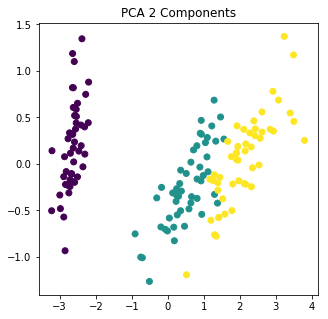

(150L, 3L)

In [171]:
#主成分分析
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
iris_X = iris.data
iris_X.shape
from sklearn import decomposition
#降到2维
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape
from matplotlib import pyplot as plt
f = plt.figure(figsize=(5, 5))
ax = f.add_subplot(111)
ax.scatter(iris_X_prime[:,0], iris_X_prime[:, 1], c=iris.target)
ax.set_title("PCA 2 Components")
plt.show()
#显示降维后的特征保留了原始特征百分之多少的信息
pca.explained_variance_ratio_.sum()
#也可以在参数中指定降维后的特征保留原始特征百分之多少的信息 0.98 表示至少保留百分之98的信息
pca = decomposition.PCA(n_components=.98)
iris_X_prime = pca.fit_transform(iris_X)
pca.explained_variance_ratio_.sum()
iris_X_prime.shape

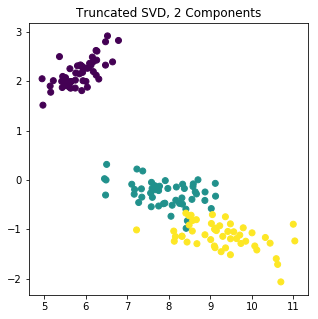

In [5]:
#截断奇异值分解 和一般的SVD相比，TSVD可以指定维度 比如SVD 如果原始矩阵是n*n的 那么分解后还是n*n  但是TSVD可以分解成指定维度，以实现降维
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
from sklearn.decomposition import TruncatedSVD
#指定维数为2
svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_data)
from matplotlib import pyplot as plt
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(111)
ax.scatter(iris_transformed[:,0], iris_transformed[:, 1], c=iris.target)
ax.set_title("Truncated SVD, 2 Components")
plt.show()

In [34]:
import numpy as np
from scipy.linalg import svd
D = np.array([[1, 2], [1, 3], [1, 4]])
U, S, V = svd(D, full_matrices=False)
U.shape, S.shape, V.shape

((3L, 2L), (2L,), (2L, 2L))

In [91]:
z = np.arange(1,101)
a = np.arange(9).reshape(3,3)  
np.dot(np.ones((5,3)),np.ones((3,2)))
b = np.random.random((5,5))  
# print str(b.max()) +' '+ str(b.min())
c = (b - b.min())/(b.max() - b.min())
#linspace(start, stop, num=50, endpoint=True, retstep=False)
#生成0~10之间均匀分布的11个数，包括0和1。
#endpoint=False,则10不包括在里面。
#retstep=False，会同时返回均匀区间中每两个数的间隔。
d = np.linspace(0,10,11,endpoint=True, retstep=True)
print 
e = np.random.random(10)
print e
f = sorted(e,reverse=True)
print f
#randint(min,max,num)生成大小为num的array，数值范围min～max
A = np.random.randint(0,2,5)  
B = np.random.randint(0,2,5)  
#判断两个array在误差范围内是否相等。函数原型allclose(a, b, rtol=1e-05, atol=1e-08)，若absolute(a - b) <= (atol + rtol * absolute(b))则相等
equal = np.allclose(A,B)  
print A.dtype


[ 0.69831473  0.97528833  0.75918416  0.54856314  0.20618025  0.98487888
  0.15876427  0.00627885  0.21212961  0.2907377 ]
[0.98487888152706271, 0.97528832629805828, 0.75918415515953575, 0.69831473372083486, 0.54856314286024399, 0.29073770392742049, 0.21212961203052272, 0.20618025157819797, 0.1587642697999162, 0.0062788513707643379]
int32


In [118]:
a = np.arange(1,10)
b = a.shape[0]
y = np.zeros((2,3,4)).astype(np.int64)
y

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=int64)

In [60]:
import numpy as np
a = np.array([[1,0,2,3],[3,2,0,1]])
mask = np.zeros(a.shape, dtype=bool)
b = np.argsort(a,kind="mergesort")[-2:]
print a
print b
print mask
mask[[(0,1),(1,1)]] = 1
print mask

[[1 0 2 3]
 [3 2 0 1]]
[[1 0 2 3]
 [2 3 1 0]]
[[False False False False]
 [False False False False]]
[[False  True False False]
 [False  True False False]]


In [53]:
import numpy as np
a = np.array([1,0,3,2])
mask = np.zeros(a.shape, dtype=bool)
b = np.argsort(a,kind="mergesort")[-2:]
print b
print mask
mask[b] = 1
print mask

[3 2]
[False False False False]
[False False  True  True]


In [63]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.base import TransformerMixin
from sklearn.utils import as_float_array
from sklearn.pipeline import Pipeline

# ---------------------------------------
# 用转换器抽取特征
# ----------------------------------------

# 模型就是用来简化世界，特征抽取也是一样。
# 降低复杂性有好处，但也有不足，简化会忽略很多细节。

# 这里的例子用adult数据集，预测一个人是否年收入多于五万美元

# 1. 载入数据
adult_filename = r'E:\data\bigdata\adult\adult.data'
adult = pd.read_csv(adult_filename, header=None, names=["Age", "Work-Class", "fnlwgt", "Education",
                                                        "Education-Num", "Marital-Status", "Occupation",
                                                        "Relationship", "Race", "Sex", "Capital-gain",
                                                        "Capital-loss", "Hours-per-week", "Native-Country",
                                                        "Earnings-Raw"])

# 2. 数据清理
# 删除缺失数据
adult.dropna(how='all', inplace=True)

# 3. 探索性数据分析
# 描述统计
print(adult["Hours-per-week"].describe())

print(adult["Work-Class"].unique())

# 3'. 演示scikit-learn特征选择的方式
X = np.arange(30).reshape((10, 3))
X[:,1] = 1
# 注意：这时X矩阵中第二列全为1

# 利用VarianceThreshold()来删除方差低于阈值的变量
vt = VarianceThreshold()
Xt = vt.fit_transform(X)
# 这个时候，第二列就被删除了，因为它的方差为零
print(vt.variances_)

# 回到adult的例子，选择最佳特征
X = adult[["Age", "Education-Num", "Capital-gain", "Capital-loss", "Hours-per-week"]].values
y = (adult["Earnings-Raw"] == ' >50K').values

# 构建选择器
transformer = SelectKBest(score_func=chi2, k=3)
Xt_chi2 = transformer.fit_transform(X, y)

# 结论：相关性最好的分别是第一、三、四列
print(transformer.scores_)

# 还可以利用皮尔逊(Pearson)相关系数进行选择
# 这里利用了SciPy库的pearsonr()函数

# 定义函数
def multivariate_pearsonr(X, y):
    scores, pvalues = [], []
    for column in range(X.shape[1]):
        cur_score, cur_p = pearsonr(X[:,column], y)
        scores.append(abs(cur_score))
        pvalues.append(cur_p)
    return (np.array(scores), np.array(pvalues))

transformer = SelectKBest(score_func=multivariate_pearsonr, k=3)
Xt_pearson = transformer.fit_transform(X, y)
print(transformer.scores_)

# 利用CART分类器，查看特征选择的准确率
clf = DecisionTreeClassifier(random_state=14)
scores_chi2 = cross_val_score(clf, Xt_chi2, y, scoring='accuracy')
scores_pearson = cross_val_score(clf, Xt_pearson, y, scoring='accuracy')

print("Chi2 performance: {0:.3f}".format(scores_chi2.mean()))
print("Pearson performance: {0:.3f}".format(scores_pearson.mean()))

# 创建自己的转换器
# 转换器的API很简单。它接受一种特定格式的数据，输出一种格式的数据。

# 转换器有两个关键函数
# - fit(): 接受训练数据，设置内部参数
# - transform(): 转换过程。接受训练数据集或相同格式的新数据集。

# 转换器范例
class MeanDiscrete(TransformerMixin):
    def fit(self, X, y=None):
        X = as_float_array(X)
        self.mean = np.mean(X, axis=0)
        return self

    def transform(self, X):
        X = as_float_array(X)
        assert X.shape[1] == self.mean.shape[0]
        return X > self.mean

pipeline = Pipeline([('mean_discrete', MeanDiscrete()),
                     ('classifier', DecisionTreeClassifier(random_state=14))])
scores_mean_discrete = cross_val_score(pipeline, X, y, scoring='accuracy')
print("Mean Discrete performance: {0:.3f}".format(scores_mean_discrete.mean()))

g:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


IOError: File E:\data\bigdata\adult\adult.data does not exist